In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks


data_df = pd.read_csv("../Datasets/data.csv")
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


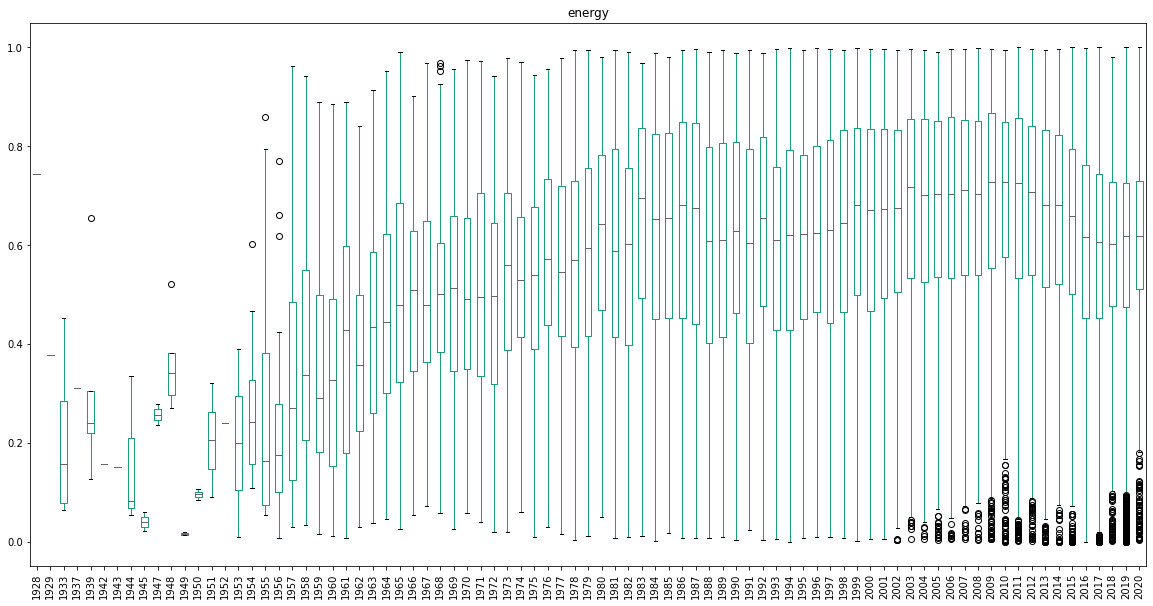

In [332]:
#Variables to use for the study

variable_to_study="energy"
popularity_minimum=48

#Code for plot

filtered_data_df=data_df.loc[data_df["popularity"]>=popularity_minimum,:]
filtered_data_df

years=df_to_study.reset_index()
years=years.year.unique()

df_to_study=filtered_data_df[[variable_to_study,"year"]]
df_to_study=df_to_study.sort_values(by="year",ascending=True)

results=[]

for x in range(len(years)):
    df_years=df_to_study.loc[df_to_study["year"]==years[x],:]
    df_years=df_years[variable_to_study]
    results.append(df_years)

dict_final={}

for x in range(len(years)):    
    dict_1 = {years[x]:(results[x])}
    dict_final.update(dict_1)

final_df=pd.DataFrame(dict_final)


final_df.plot(kind="box",rot=90, figsize=(20,10),colormap='Dark2',title=variable_to_study)
plt.show()


<AxesSubplot:>

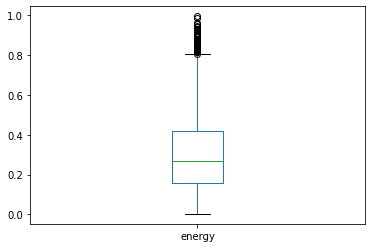

In [344]:
# data_df.loc[data_df["year"]==1956]
data_df.loc[data_df["year"]==1956,:]["energy"].plot(kind="box")

In [280]:
df_to_study.loc[df_to_study["year"]==years[x],:]["valence"]

13166    0.907
13167    0.800
13168    0.486
13169    0.385
13170    0.588
         ...  
27660    0.632
33714    0.641
33715    0.384
36214    0.736
38454    0.848
Name: valence, Length: 211, dtype: float64

count    2664.000000
mean       40.119079
std        16.018515
min         0.000000
25%        33.000000
50%        43.000000
75%        50.879969
max        82.000000
Name: popularity, dtype: float64

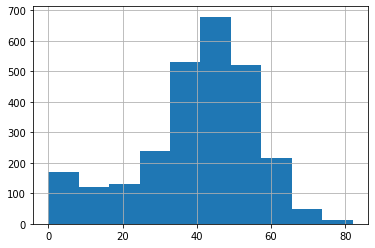

In [4]:
genre_df["popularity"].hist()
genre_df["popularity"].describe()

In [5]:
#Demostrar el grado de valence en los Top 100 de géneros populares

genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_popularity.head(100)

,genres,popularity,valence
512,circuit,82.000000,0.556000
1118,guaracha,82.000000,0.556000
2141,russian dance,79.000000,0.326000
34,afroswing,77.625000,0.701125
2104,ritmo kombina,77.333333,0.505333
...,...,...,...
1419,k-pop girl group,63.675769,0.674597
2511,uk hip hop,63.544762,0.528890
2377,swedish tropical house,63.500000,0.223500
2384,swiss pop,63.500000,0.492500


In [6]:
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)
genres_energy.head(100)

,genres,energy,danceability,loudness,popularity,valence
1799,norwegian death metal,0.999500,0.204000,-5.127500,41.000000,0.027850
251,black 'n' roll,0.999500,0.204000,-5.127500,41.000000,0.027850
255,blackened crust,0.999500,0.204000,-5.127500,41.000000,0.027850
156,australian ska,0.994667,0.312667,-4.356000,44.333333,0.228900
2423,tennessee metal,0.994333,0.372000,-4.621000,46.000000,0.105967
...,...,...,...,...,...,...
1537,manchester indie,0.920000,0.402000,-2.944000,44.000000,0.297000
1849,okinawan pop,0.919500,0.481000,-3.761000,59.250000,0.633500
1504,liverpool indie,0.919000,0.429071,-5.046714,52.285714,0.574571
865,easycore,0.918714,0.549819,-3.988851,46.206494,0.565258
